In [1]:
import torch
from torchvision import models

In [3]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [4]:
resnet = models.resnet101(pretrained=True)

In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
from torchvision import transforms

In [15]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])])

In [12]:
from PIL import Image
img = Image.open("data/dog.jpg")

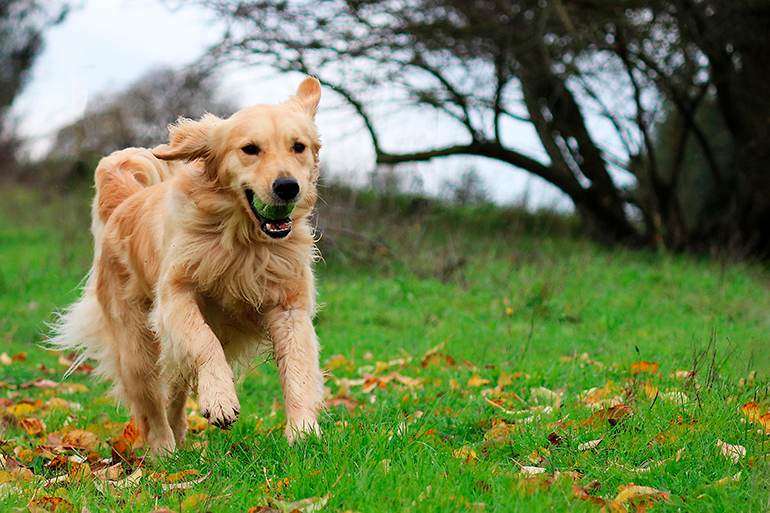

In [13]:
img

In [16]:
img_t = preprocess(img)

In [17]:
img_t.shape

torch.Size([3, 224, 224])

In [18]:
batch_t = torch.unsqueeze(img_t, 0)

In [19]:
batch_t.shape

torch.Size([1, 3, 224, 224])

In [20]:
# Poner en modo inferencia la red
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
out = resnet(batch_t)
out

tensor([[-2.0399e+00, -1.1056e+00, -3.3798e+00, -3.8629e+00, -3.5320e+00,
         -3.2533e+00, -3.2922e+00, -7.7252e-01,  5.3084e-01, -1.1342e+00,
         -1.1664e+00,  4.2161e-01, -1.1096e+00, -6.8075e-01, -1.3382e+00,
         -2.1808e-01, -1.7341e+00,  4.4795e-01,  1.4505e+00, -4.0334e-01,
         -1.8252e+00, -1.4829e+00, -1.1501e+00, -2.9667e-02,  7.7629e-01,
          9.1440e-02, -1.8303e+00, -2.2550e-01, -7.8180e-01, -1.9833e+00,
         -6.2535e-02, -7.0063e-02, -3.5943e-01, -2.9599e+00, -1.8763e+00,
         -9.8625e-01, -4.9388e-01, -6.1033e-01, -1.3785e+00,  3.3602e-01,
         -8.6390e-02, -4.5348e-01,  2.4399e-01, -1.0863e+00, -9.4068e-01,
         -1.7264e+00,  1.9872e+00, -7.5629e-01, -2.5106e+00, -1.1292e+00,
         -1.0042e+00, -3.0981e+00, -3.6743e-02,  9.5599e-02,  5.7846e-01,
          6.3698e-01, -8.0636e-01,  3.5090e-01, -5.9822e-01,  8.4622e-01,
          1.3191e+00, -1.7217e+00, -9.6515e-01, -2.3696e-01, -1.2441e+00,
         -2.5845e+00, -1.4867e+00,  9.

In [22]:
# Cargar labels
with open('data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [23]:
# Obtener la predicción mas alta.
_, index = torch.max(out, 1)

In [24]:
index

tensor([207])

In [25]:
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 89.56654357910156)

In [28]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 89.56654357910156),
 ('tennis ball', 2.0165023803710938),
 ('Labrador retriever', 1.030409574508667),
 ('cocker spaniel, English cocker spaniel, cocker', 0.7147925496101379),
 ('Irish terrier', 0.35879799723625183)]